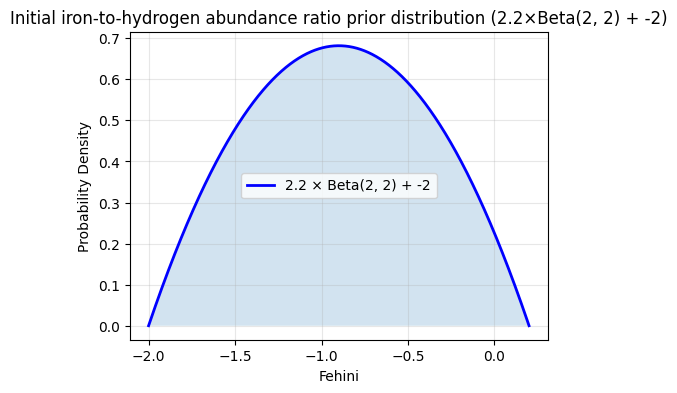

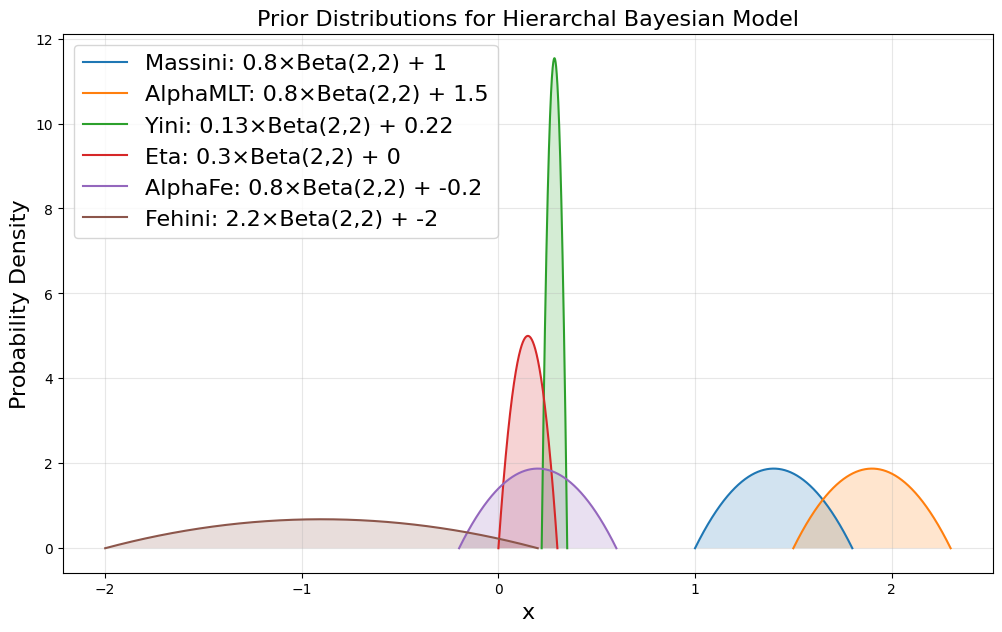

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def plot_scaled_beta_distribution(a, b, scale=1.0, shift=0.0, num_points=1000, title=None):
    """
    Plot a scaled and shifted beta distribution: scale * Beta(a,b) + shift
    
    Parameters:
    a (float): Alpha parameter (shape parameter)
    b (float): Beta parameter (shape parameter)
    scale (float): Multiplicative scaling factor
    shift (float): Additive shift
    num_points (int): Number of points to plot
    title (str): Optional title for the plot
    """
    # Generate x values adjusted for scaling and shifting
    x_beta = np.linspace(0, 1, num_points)
    x_transformed = x_beta * scale + shift
    
    # Calculate beta distribution values and adjust for scaling
    y = beta.pdf(x_beta, a, b) / scale  # Divide by scale to maintain area = 1
    
    # Create the plot
    plt.figure(figsize=(5.4, 4))
    plt.plot(x_transformed, y, 'b-', lw=2, 
             label=f'{scale} × Beta({a}, {b}) + {shift}')
    
    # Add labels and title
    plt.xlabel('Fehini')
    plt.ylabel('Probability Density')
    plt.title(f'Initial iron-to-hydrogen abundance ratio prior distribution ({scale}×Beta({a}, {b}) + {shift})')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    # Add fill
    plt.fill_between(x_transformed, y, alpha=0.2)
    
    return plt

# Example usage with your case
plot_scaled_beta_distribution(2, 2, scale=2.2, shift=-2)
plt.show()

# Multiple scaled/shifted distributions example
fig = plt.figure(figsize=(12, 7))

distributions = [
    (2, 2, 0.8, 1, 'Massini'),
    (2, 2, 0.8, 1.5, 'AlphaMLT'),
    (2, 2, 0.13, 0.22, 'Yini'),
    (2, 2, 0.3, 0, 'Eta'),
    (2, 2, 0.8, -0.2, 'AlphaFe'),
    (2, 2, 2.2, -2, 'Fehini')
]

for a, b, scale, shift, name in distributions:
    x_beta = np.linspace(0, 1, 1000)
    x_transformed = x_beta * scale + shift
    y = beta.pdf(x_beta, a, b) / scale
    plt.plot(x_transformed, y, label=f'{name}: {scale}×Beta({a},{b}) + {shift}')
    # Add fill
    plt.fill_between(x_transformed, y, alpha=0.2)

plt.xlabel('x', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Prior Distributions for Hierarchal Bayesian Model', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()


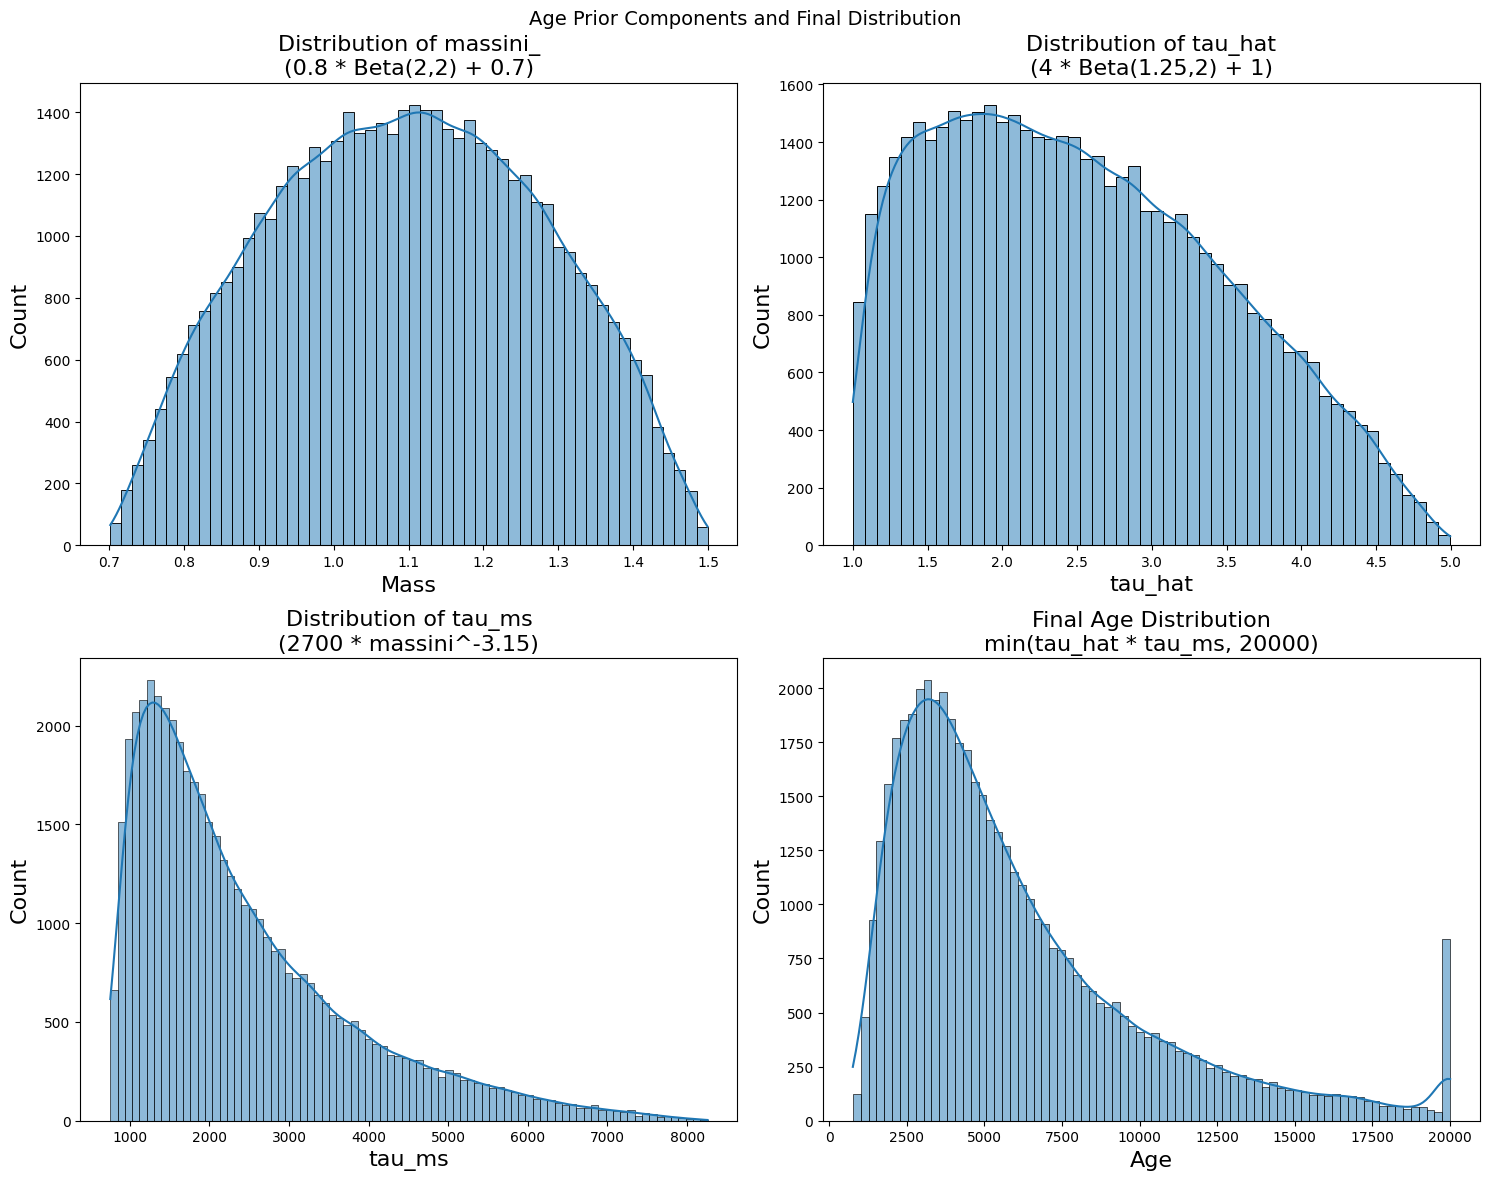

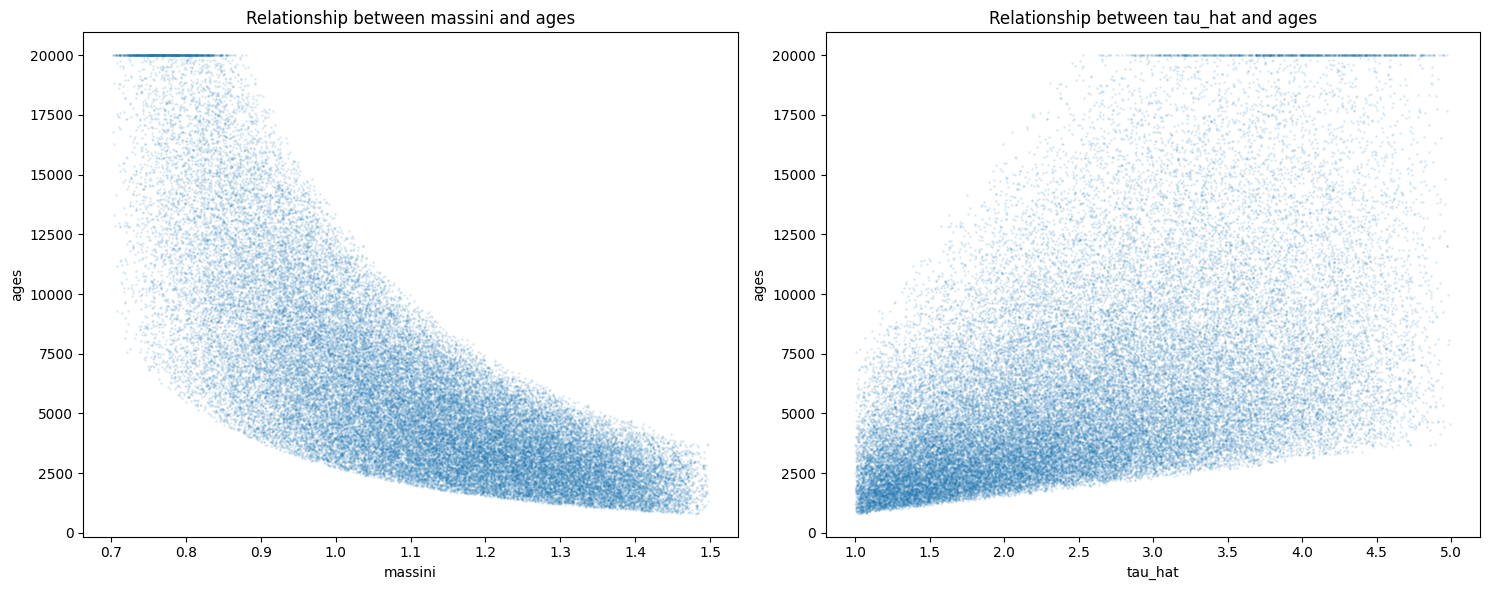

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from scipy.stats import beta
import seaborn as sns

def plot_age_prior(n_samples=10000):
    """
    Plot the age prior distribution and its components
    
    Parameters:
    n_samples (int): Number of samples to generate for the distributions
    """
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Age Prior Components and Final Distribution', fontsize=14)
    
    # Generate samples for massini
    massini_s = np.random.beta(2, 2, n_samples)
    massini = 0.8 * massini_s + 0.7
    
    # Generate samples for tau_hat
    tau_hat_s = np.random.beta(1.25, 2, n_samples)
    tau_hat = 4 * tau_hat_s + 1
    
    # Calculate final ages
    tau_ms = 2700 * (massini**-3.15)
    ages = np.minimum(tau_hat * tau_ms, 20000)
    
    # Plot massini distribution
    ax = axes[0, 0]
    sns.histplot(massini, kde=True, ax=ax)
    ax.set_title('Distribution of massini_\n(0.8 * Beta(2,2) + 0.7)', fontsize=16)
    ax.set_xlabel('Mass', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    
    # Plot tau_hat distribution
    ax = axes[0, 1]
    sns.histplot(tau_hat, kde=True, ax=ax)
    ax.set_title('Distribution of tau_hat\n(4 * Beta(1.25,2) + 1)', fontsize=16)
    ax.set_xlabel('tau_hat', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    
    # Plot tau_ms distribution
    ax = axes[1, 0]
    sns.histplot(tau_ms, kde=True, ax=ax)
    ax.set_title('Distribution of tau_ms\n(2700 * massini^-3.15)', fontsize=16)
    ax.set_xlabel('tau_ms', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    
    # Plot final age distribution
    ax = axes[1, 1]
    sns.histplot(ages, kde=True, ax=ax)
    ax.set_title('Final Age Distribution\nmin(tau_hat * tau_ms, 20000)', fontsize=16)
    ax.set_xlabel('Age', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)
    
    # Adjust layout
    plt.tight_layout()
    return fig

# Generate plots
fig = plot_age_prior(n_samples=50000)
plt.show()

# Additional visualization focusing on the relationship between components
def plot_relationships(n_samples=10000):
    """
    Plot relationships between different components of the age prior
    """
    # Generate samples
    massini_s = np.random.beta(2, 2, n_samples)
    massini = 0.8 * massini_s + 0.7
    tau_hat_s = np.random.beta(1.25, 2, n_samples)
    tau_hat = 4 * tau_hat_s + 1
    tau_ms = 2700 * (massini**-3.15)
    ages = np.minimum(tau_hat * tau_ms, 20000)
    
    # Create scatter plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot massini vs ages
    axes[0].scatter(massini, ages, alpha=0.1, s=1)
    axes[0].set_xlabel('massini')
    axes[0].set_ylabel('ages')
    axes[0].set_title('Relationship between massini and ages')
    
    # Plot tau_hat vs ages
    axes[1].scatter(tau_hat, ages, alpha=0.1, s=1)
    axes[1].set_xlabel('tau_hat')
    axes[1].set_ylabel('ages')
    axes[1].set_title('Relationship between tau_hat and ages')
    
    plt.tight_layout()
    return fig

# Generate relationship plots
fig = plot_relationships(n_samples=50000)
plt.show()